In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, Input, Concatenate, Reshape
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.utils import to_categorical, Sequence
import cv2
from keras.models import model_from_json
from sklearn.metrics import confusion_matrix, classification_report

# Augmentation

In [2]:
face_train_gen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    brightness_range=(0.5, 0.6),
)

eyes_train_gen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    brightness_range=(0.5, 0.6),
)

mouth_train_gen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    brightness_range=(0.5, 0.6),
)

face_test_gen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    brightness_range=(0.5, 0.6),
)

eyes_test_gen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    brightness_range=(0.5, 0.6),
)

mouth_test_gen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    brightness_range=(0.5, 0.6),
)

# Train & Test Generator

In [3]:
face_train_generator = face_train_gen.flow_from_directory(
    'data/train/face_train/',
    target_size=(38, 38),
    batch_size=64,
    color_mode="grayscale",
    class_mode="categorical"
)

eyes_train_generator = eyes_train_gen.flow_from_directory(
    'data/train/eyes_train/',
    target_size=(30, 62),
    batch_size=64,
    color_mode="grayscale",
    class_mode="categorical"
)

mouth_train_generator = mouth_train_gen.flow_from_directory(
    'data/train/mouth_train/',
    target_size=(30, 38),
    batch_size=64,
    color_mode="grayscale",
    class_mode="categorical"
)

face_valid_generator = face_test_gen.flow_from_directory(
    'data/test/face_test/',
    target_size=(38, 38),
    batch_size=64,
    color_mode="grayscale",
    class_mode="categorical"
)

eyes_valid_generator = eyes_test_gen.flow_from_directory(
    'data/test/eyes_test/',
    target_size=(30, 62),
    batch_size=64,
    color_mode="grayscale",
    class_mode="categorical"
)

mouth_valid_generator = mouth_test_gen.flow_from_directory(
    'data/test/mouth_test/',
    target_size=(30, 38),
    batch_size=64,
    color_mode="grayscale",
    class_mode="categorical"
)

Found 776 images belonging to 7 classes.
Found 777 images belonging to 7 classes.


Found 769 images belonging to 7 classes.
Found 181 images belonging to 7 classes.
Found 181 images belonging to 7 classes.
Found 181 images belonging to 7 classes.


# Build The Three Channel Convolutional Neural Network

## Mean (Face)

In [4]:
face_emotion_model = Sequential()

face_emotion_model.add(Conv2D(6, kernel_size=(3, 3), activation='relu', input_shape=(38, 38, 1), name="conv_1"))
face_emotion_model.add(MaxPooling2D(pool_size=(2, 2), name="pool_1"))

face_emotion_model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(18, 18, 6), name="conv_2"))
face_emotion_model.add(MaxPooling2D(pool_size=(2, 2), name="pool_2"))

face_emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(8, 8, 1), name="conv_3"))
face_emotion_model.add(MaxPooling2D(pool_size=(2, 2), name="pool_3"))

face_emotion_model.add(Flatten(name="face_flatten"))

face_emotion_model.add(Dense(1024, activation='relu'))
face_emotion_model.add(Dropout(0.25))

face_emotion_model.add(Dense(7, activation='softmax'))

face_emotion_model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.0001, decay=1e-6), metrics=['accuracy'])

face_emotion_model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 36, 36, 6)         60        
                                                                 
 pool_1 (MaxPooling2D)       (None, 18, 18, 6)         0         
                                                                 
 conv_2 (Conv2D)             (None, 16, 16, 16)        880       
                                                                 
 pool_2 (MaxPooling2D)       (None, 8, 8, 16)          0         
                                                                 
 conv_3 (Conv2D)             (None, 6, 6, 32)          4640      
                                                                 
 pool_3 (MaxPooling2D)       (None, 3, 3, 32)          0         
                                                                 
 face_flatten (Flatten)      (None, 288)              

In [5]:
face_train = face_emotion_model.fit(
    face_train_generator,
    steps_per_epoch= 776 // 64,
    epochs=100,
    validation_data=face_valid_generator,
    validation_steps= 181 // 64  
)

Epoch 1/100


12/12 [==============================] - 4s 199ms/step - loss: 1.9450 - accuracy: 0.1713 - val_loss: 1.9494 - val_accuracy: 0.1406
Epoch 2/100
12/12 [==============================] - 1s 87ms/step - loss: 1.9355 - accuracy: 0.1868 - val_loss: 1.9571 - val_accuracy: 0.1094
Epoch 3/100
12/12 [==============================] - 1s 93ms/step - loss: 1.9265 - accuracy: 0.1994 - val_loss: 1.9640 - val_accuracy: 0.1172
Epoch 4/100
12/12 [==============================] - 1s 86ms/step - loss: 1.9234 - accuracy: 0.2008 - val_loss: 1.9560 - val_accuracy: 0.1484
Epoch 5/100
12/12 [==============================] - 1s 95ms/step - loss: 1.9211 - accuracy: 0.1882 - val_loss: 1.9774 - val_accuracy: 0.1094
Epoch 6/100
12/12 [==============================] - 1s 88ms/step - loss: 1.9133 - accuracy: 0.1952 - val_loss: 1.9798 - val_accuracy: 0.1406
Epoch 7/100
12/12 [==============================] - 1s 93ms/step - loss: 1.9090 - accuracy: 0.1940 - val_loss: 1.9854 - val_accuracy: 0.1094
Epo

Plotting training and validation accuracy

Training: 0.6165730357170105
Validation: 0.2109375


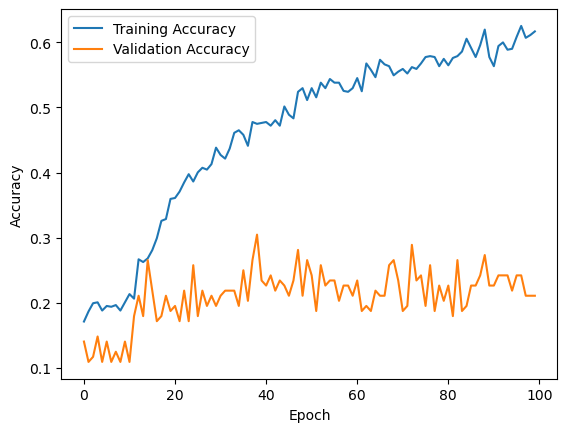

In [6]:
print("Training:", face_train.history['accuracy'][-1])
print("Validation:", face_train.history['val_accuracy'][-1])

plt.plot(face_train.history['accuracy'], label='Training Accuracy')
plt.plot(face_train.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Variance (Eyes & Eyebrows)

In [7]:
eyes_emotion_model = Sequential()

eyes_emotion_model.add(Conv2D(6, kernel_size=(3, 3), activation='relu', input_shape=(30, 62, 1)))
eyes_emotion_model.add(MaxPooling2D(pool_size=(2, 2)))

eyes_emotion_model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(14, 30, 6)))
eyes_emotion_model.add(MaxPooling2D(pool_size=(2, 2)))

eyes_emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(6, 14, 16)))
eyes_emotion_model.add(MaxPooling2D(pool_size=(2, 2)))

eyes_emotion_model.add(Flatten(name="eyes_flatten"))

eyes_emotion_model.add(Dense(1024, activation='relu'))
eyes_emotion_model.add(Dropout(0.25))

eyes_emotion_model.add(Dense(7, activation='softmax'))

eyes_emotion_model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.0001, decay=1e-6), metrics=['accuracy'])

eyes_emotion_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 60, 6)         60        
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 30, 6)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 28, 16)        880       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 14, 16)         0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 12, 32)         4640      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 6, 32)         

In [8]:
eyes_train = eyes_emotion_model.fit(
    eyes_train_generator,
    steps_per_epoch= 777 // 64,
    epochs=100,
    validation_data=eyes_valid_generator,
    validation_steps= 181 // 64  
)

Epoch 1/100
12/12 [==============================] - 2s 99ms/step - loss: 1.9442 - accuracy: 0.1711 - val_loss: 1.9473 - val_accuracy: 0.1328
Epoch 2/100
12/12 [==============================] - 1s 51ms/step - loss: 1.9310 - accuracy: 0.1879 - val_loss: 1.9634 - val_accuracy: 0.1094
Epoch 3/100
12/12 [==============================] - 1s 52ms/step - loss: 1.9305 - accuracy: 0.1978 - val_loss: 1.9494 - val_accuracy: 0.1562
Epoch 4/100
12/12 [==============================] - 1s 49ms/step - loss: 1.9177 - accuracy: 0.1992 - val_loss: 1.9676 - val_accuracy: 0.1406
Epoch 5/100
12/12 [==============================] - 1s 42ms/step - loss: 1.9224 - accuracy: 0.1935 - val_loss: 1.9623 - val_accuracy: 0.1250
Epoch 6/100
12/12 [==============================] - 1s 47ms/step - loss: 1.9119 - accuracy: 0.1950 - val_loss: 1.9724 - val_accuracy: 0.1406
Epoch 7/100
12/12 [==============================] - 1s 42ms/step - loss: 1.9145 - accuracy: 0.1978 - val_loss: 1.9635 - val_accuracy: 0.1328
Epoch 

Plotting training and validation accuracy

Training: 0.5511921644210815
Validation: 0.2734375


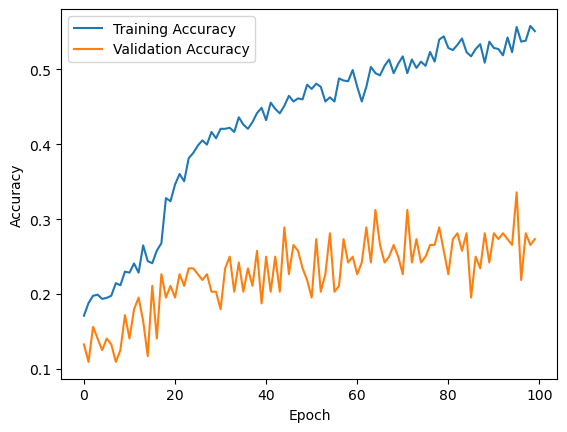

In [9]:
print("Training:", eyes_train.history['accuracy'][-1])
print("Validation:", eyes_train.history['val_accuracy'][-1])

plt.plot(eyes_train.history['accuracy'], label='Training Accuracy')
plt.plot(eyes_train.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Variance (Mouth)

In [10]:
mouth_emotion_model = Sequential()

mouth_emotion_model.add(Conv2D(6, kernel_size=(3, 3), activation='relu', input_shape=(30, 38, 1)))
mouth_emotion_model.add(MaxPooling2D(pool_size=(2, 2)))

mouth_emotion_model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(14, 18, 6)))
mouth_emotion_model.add(MaxPooling2D(pool_size=(2, 2)))

mouth_emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(6, 8, 16)))
mouth_emotion_model.add(MaxPooling2D(pool_size=(2, 2)))

mouth_emotion_model.add(Flatten(name="mouth_flatten"))

mouth_emotion_model.add(Dense(1024, activation='relu'))
mouth_emotion_model.add(Dropout(0.25))

mouth_emotion_model.add(Dense(7, activation='softmax'))

mouth_emotion_model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.0001, decay=1e-6), metrics=['accuracy'])

mouth_emotion_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 36, 6)         60        
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 18, 6)         0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 12, 16, 16)        880       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 6, 8, 16)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 6, 32)          4640      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 2, 3, 32)         

In [11]:
mouth_train = mouth_emotion_model.fit(
    mouth_train_generator,
    steps_per_epoch= 769 // 64,
    epochs=100,
    validation_data=mouth_valid_generator,
    validation_steps= 181 // 64  
)

Epoch 1/100
12/12 [==============================] - 3s 184ms/step - loss: 1.9407 - accuracy: 0.1518 - val_loss: 1.9549 - val_accuracy: 0.1172
Epoch 2/100
12/12 [==============================] - 1s 87ms/step - loss: 1.9373 - accuracy: 0.1801 - val_loss: 1.9585 - val_accuracy: 0.1328
Epoch 3/100
12/12 [==============================] - 1s 90ms/step - loss: 1.9332 - accuracy: 0.2174 - val_loss: 1.9639 - val_accuracy: 0.1250
Epoch 4/100
12/12 [==============================] - 1s 93ms/step - loss: 1.9285 - accuracy: 0.1986 - val_loss: 1.9639 - val_accuracy: 0.1328
Epoch 5/100
12/12 [==============================] - 1s 90ms/step - loss: 1.9274 - accuracy: 0.1887 - val_loss: 1.9662 - val_accuracy: 0.1484
Epoch 6/100
12/12 [==============================] - 1s 87ms/step - loss: 1.9261 - accuracy: 0.1858 - val_loss: 1.9836 - val_accuracy: 0.1016
Epoch 7/100
12/12 [==============================] - 1s 93ms/step - loss: 1.9182 - accuracy: 0.1915 - val_loss: 1.9626 - val_accuracy: 0.1172
Epoch

Plotting training and validation accuracy

Training: 0.3858155906200409
Validation: 0.2890625


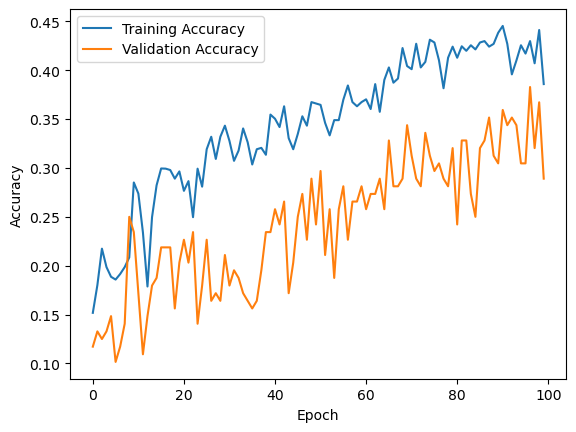

In [12]:
print("Training:", mouth_train.history['accuracy'][-1])
print("Validation:", mouth_train.history['val_accuracy'][-1])

plt.plot(mouth_train.history['accuracy'], label='Training Accuracy')
plt.plot(mouth_train.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Feature Extraction

Based on the journal that we will implement, now we need to get feature extraction from the flatten layer.

All the features obtained will be in the form of an tensor

In [13]:
flatten_face = face_emotion_model.get_layer('face_flatten').output
flatten_eyes = eyes_emotion_model.get_layer('eyes_flatten').output
flatten_mouth = mouth_emotion_model.get_layer('mouth_flatten').output

In [14]:
flatten_face

<KerasTensor: shape=(None, 288) dtype=float32 (created by layer 'face_flatten')>

In [15]:
flatten_eyes

<KerasTensor: shape=(None, 384) dtype=float32 (created by layer 'eyes_flatten')>

In [16]:
flatten_mouth

<KerasTensor: shape=(None, 192) dtype=float32 (created by layer 'mouth_flatten')>

# Concate The Feature and Make New Model

Merge all feature in `flatten layer`

In [17]:
concatenated_features = Concatenate(axis=-1)([flatten_face, flatten_eyes, flatten_mouth])

Now we want to reshape the `concatenated_features` into a **tensor** with shape (864, 1). This reshaping is often necessary to prepare the data for further processing.

In [18]:
# reshaped_features = Reshape((864, 1))(concatenated_features)

Adding dense layer, so the model can learn more complex representation

In [19]:
dense_layer = Dense(1024, activation='relu')(concatenated_features)

We will using dropout to prevent overfitting by reducing reliance on specific neurons.

In [20]:
drop = Dropout(0.5)(dense_layer)

Create layer for the final output with 7 units based on the class that we have

In [21]:
output_layer = Dense(7, activation='softmax')(concatenated_features)

Creates a Keras Model that takes the inputs from three different models
* face_emotion_model.input 
* eyes_emotion_model.input 
* mouth_emotion_model.input 

and outputs the result from the previously defined `output_layer`.

In [22]:
feature_fusion_model = Model(inputs=[face_emotion_model.input, eyes_emotion_model.input, mouth_emotion_model.input], outputs=output_layer)

In [23]:
feature_fusion_model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.001, decay=1e-6), metrics=['accuracy'])

Now we want to check if the model that we make is correct

In [24]:
feature_fusion_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 conv_1_input (InputLayer)   [(None, 38, 38, 1)]          0         []                            
                                                                                                  
 conv2d_input (InputLayer)   [(None, 30, 62, 1)]          0         []                            
                                                                                                  
 conv2d_3_input (InputLayer  [(None, 30, 38, 1)]          0         []                            
 )                                                                                                
                                                                                                  
 conv_1 (Conv2D)             (None, 36, 36, 6)            60        ['conv_1_input[0][0]']    

# Generating Combined Data for Feature Fusion Model

Create a generator function (`generate_combined_data`) intended for use in training a feature fusion model. The purpose of the generator is to create batches of combined input data, specifically for the face, eyes, and mouth, along with their corresponding output labels. The code ensures that all batches have an equal number of samples by determining the minimum number of samples among the three input sources. The face labels are then used as the `ground truth` for the combined model.

The generator is structured to be used within a training loop, providing a continuous flow of batches for training the feature fusion model effectively. This approach is essential when dealing with multiple input sources and maintaining consistency in the number of samples across these sources.

Powered by OpenAI, Bard, BlackBox 😁😅

In [25]:
def generate_combined_data(face_generator, eyes_generator, mouth_generator):
    while True:
        face_data = face_generator.next()
        eyes_data = eyes_generator.next()
        mouth_data = mouth_generator.next()

        # Ensure all batches have the same number of samples
        min_samples = min(face_data[0].shape[0], eyes_data[0].shape[0], mouth_data[0].shape[0])
        combined_input = [face_data[0][:min_samples], eyes_data[0][:min_samples], mouth_data[0][:min_samples]]

        # Using face labels as ground truth for the combined model
        combined_output = face_data[1][:min_samples]  

        yield combined_input, combined_output

# Creating Combined Data Generators for Training and Validation

We're creating two special data generators: one for training (`combined_train_generator`) and another for validation (`combined_valid_generator`). These generators are all set to generate batches of combined input data, ensuring a harmonious blend of faces, eyes, and mouths for both training and validation phases.

In [26]:
combined_train_generator = generate_combined_data(face_train_generator, eyes_train_generator, mouth_train_generator)
combined_valid_generator = generate_combined_data(face_valid_generator, eyes_valid_generator, mouth_valid_generator)

# Train The  Model

Make parameters that are used (**optional**)  during the training of a model in Keras to define the number of batches to be drawn from the generator for one epoch and for one validation run, respectively.

In [27]:
steps_per_epoch = min(len(face_train_generator), len(eyes_train_generator), len(mouth_train_generator))
validation_steps = min(len(face_valid_generator), len(eyes_valid_generator), len(mouth_valid_generator))

In [28]:
print("Step per epochs: ", steps_per_epoch)
print("Validation steps: ", validation_steps)

Step per epochs:  13
Validation steps:  3


In [29]:
feature_fusion_train = feature_fusion_model.fit(
    combined_train_generator,
    steps_per_epoch=39,
    epochs=100,
    validation_data=combined_valid_generator,
    validation_steps=8
)

Epoch 1/100
39/39 [==============================] - 11s 249ms/step - loss: 1.8885 - accuracy: 0.2219 - val_loss: 1.9886 - val_accuracy: 0.1265
Epoch 2/100
39/39 [==============================] - 9s 246ms/step - loss: 1.7064 - accuracy: 0.3515 - val_loss: 1.9731 - val_accuracy: 0.1592
Epoch 3/100
39/39 [==============================] - 6s 151ms/step - loss: 1.5452 - accuracy: 0.4161 - val_loss: 2.1165 - val_accuracy: 0.1714
Epoch 4/100
39/39 [==============================] - 4s 98ms/step - loss: 1.4547 - accuracy: 0.4352 - val_loss: 2.2506 - val_accuracy: 0.1735
Epoch 5/100
39/39 [==============================] - 4s 99ms/step - loss: 1.3493 - accuracy: 0.5011 - val_loss: 2.1785 - val_accuracy: 0.2143
Epoch 6/100
39/39 [==============================] - 5s 126ms/step - loss: 1.3031 - accuracy: 0.5063 - val_loss: 2.2439 - val_accuracy: 0.2041
Epoch 7/100
39/39 [==============================] - 5s 128ms/step - loss: 1.2691 - accuracy: 0.5150 - val_loss: 2.1979 - val_accuracy: 0.1980


Plotting training and validation accuracy

Training: 0.9557867646217346
Validation: 0.3204081654548645


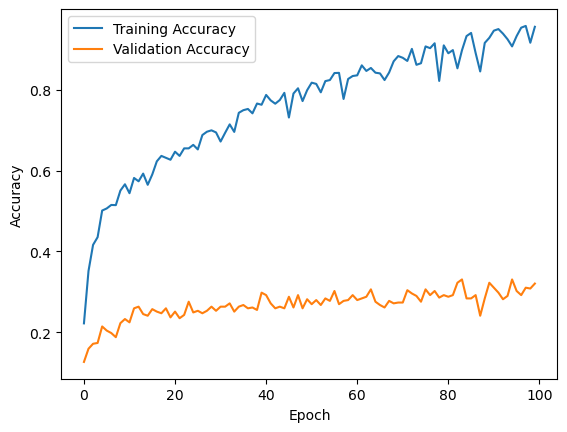

In [30]:
print("Training:", feature_fusion_train.history['accuracy'][-1])
print("Validation:", feature_fusion_train.history['val_accuracy'][-1])

plt.plot(feature_fusion_train.history['accuracy'], label='Training Accuracy')
plt.plot(feature_fusion_train.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [31]:
predictions = feature_fusion_model.predict(combined_train_generator, steps=8)

predicted_labels = predictions.argmax(axis=1)

print("Predicted Labels:", predicted_labels[:100])
print("True Labels:", face_valid_generator.classes[:100])

8/8 [==============================] - 1s 63ms/step
Predicted Labels: [6 5 3 0 4 3 1 4 2 3 2 0 1 0 3 3 6 6 5 1 6 6 4 4 6 5 6 3 2 4 4 6 0 4 0 6 4
 5 5 0 0 6 2 0 4 1 4 5 5 4 0 4 5 1 6 5 1 4 5 4 4 4 6 2 6 3 6 2 6 5 4 5 2 1
 1 3 6 5 3 4 2 6 2 4 5 0 4 4 2 3 4 1 3 6 5 6 4 4 5 0]
True Labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4]


In [32]:
predictions

array([[4.9638342e-11, 3.7777220e-06, 3.7608180e-07, ..., 6.1613150e-06,
        7.0739602e-06, 9.9998260e-01],
       [1.3738704e-06, 1.1480115e-01, 4.2174766e-03, ..., 2.5054373e-02,
        8.5580909e-01, 4.3166401e-05],
       [2.0377068e-02, 1.3249812e-02, 6.9760950e-04, ..., 4.8796028e-05,
        2.1935996e-04, 7.8661678e-08],
       ...,
       [4.2004339e-10, 5.1731238e-04, 3.6119389e-05, ..., 7.0349306e-05,
        4.5747845e-05, 9.9666470e-01],
       [2.8270457e-04, 5.1610812e-07, 1.6565442e-05, ..., 4.9794852e-10,
        1.2407198e-06, 6.6547592e-08],
       [2.1082466e-03, 1.2903691e-03, 7.5561053e-01, ..., 1.0230069e-04,
        5.5546770e-05, 8.4955682e-04]], dtype=float32)

In [33]:
print("Total class:", predictions.shape[1])
print("Unique predicted labels:", np.unique(predicted_labels))
print("Unique true labels:", np.unique(face_valid_generator.classes))


Total class: 7
Unique predicted labels: [0 1 2 3 4 5 6]
Unique true labels: [0 1 2 3 4 5 6]


In [34]:
conf_matrix = confusion_matrix(face_valid_generator.classes[:100], predicted_labels[:100])

print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(classification_report(face_valid_generator.classes[:100], predicted_labels[:100]))


Confusion Matrix:
[[3 3 2 5 2 2 4]
 [4 0 2 1 6 3 6]
 [2 3 0 0 7 5 1]
 [1 2 6 4 7 4 6]
 [1 1 0 1 2 2 2]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.27      0.14      0.19        21
           1       0.00      0.00      0.00        22
           2       0.00      0.00      0.00        18
           3       0.36      0.13      0.20        30
           4       0.08      0.22      0.12         9
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0

    accuracy                           0.09       100
   macro avg       0.10      0.07      0.07       100
weighted avg       0.17      0.09      0.11       100



c:\Users\ESPB\miniconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ESPB\miniconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ESPB\miniconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Save The Model & Weight

In [42]:
import os

model_folder = 'model'
if not os.path.exists(model_folder):
    os.makedirs(model_folder)

final_training_accuracy = feature_fusion_train.history['accuracy'][-1]

accuracy_percentage = round(final_training_accuracy * 100)

model_json = feature_fusion_model.to_json()
json_filename = f"{model_folder}/emotion_model_{accuracy_percentage}%.json"
with open(json_filename, "w") as json_file:
    json_file.write(model_json)

weights_filename = f"{model_folder}/emotion_model_{accuracy_percentage}%.h5"
feature_fusion_model.save_weights(weights_filename)

# Testing

In [35]:
json_filename = 'model/emotion_model_96%.json'
with open(json_filename, 'r') as json_file:
    loaded_model_json = json_file.read()
    loaded_model = model_from_json(loaded_model_json)

# Load model weights
weights_filename = 'model/emotion_model_96%.h5'
loaded_model.load_weights(weights_filename)

In [36]:
emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}

In [37]:
face_image_path = 'tes/1.png'
face_img = image.load_img(face_image_path, target_size=(38, 38), color_mode='grayscale')
face_array = image.img_to_array(face_img)
face_array = np.expand_dims(face_array, axis=0)
face_array /= 255.0  # Rescale

eyes_image_path = 'tes/2.png'
eyes_img = image.load_img(eyes_image_path, target_size=(30, 62), color_mode='grayscale')
eyes_array = image.img_to_array(eyes_img)
eyes_array = np.expand_dims(eyes_array, axis=0)
eyes_array /= 255.0  # Rescale

mouth_image_path = 'tes/3.png'
mouth_img = image.load_img(mouth_image_path, target_size=(30, 38), color_mode='grayscale')
mouth_array = image.img_to_array(mouth_img)
mouth_array = np.expand_dims(mouth_array, axis=0)
mouth_array /= 255.0  # Rescale

In [38]:
combined_prediction = loaded_model.predict([face_array, eyes_array, mouth_array])

1/1 [==============================] - 0s 125ms/step


In [39]:
predicted_class_index = np.argmax(combined_prediction)

In [40]:
predicted_emotion = emotion_dict[predicted_class_index]

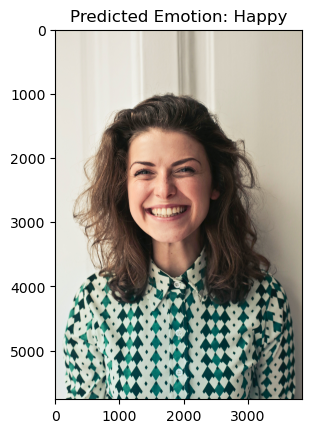

In [41]:
ori_path = 'tes/happy.jpg'
original_image = image.load_img(ori_path)
plt.imshow(original_image)
plt.title(f'Predicted Emotion: {predicted_emotion}')
plt.show()